<img src='img/Screen Shot 2021-10-28 at 1.55.00 AM.png'>

In [1]:
import matplotlib.pyplot as plt; plt.style.use('seaborn')
import numpy as np; np.random.seed(0)
import pandas as pd
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv'
df = pd.read_csv(url)
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


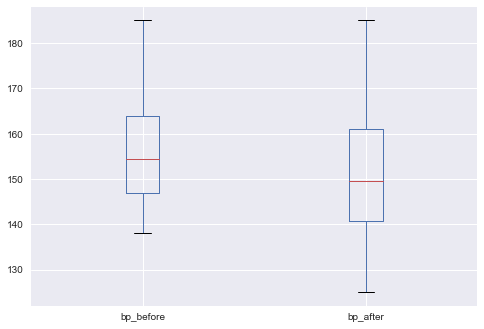

In [3]:
# check for any significant outliers 
df[['bp_before','bp_after']].plot(kind='box');

In [4]:
# Remember that for the dependent sample T-test the normality check 
# needs to be conducted on differences between the two scores.
df['bp_difference'] = df['bp_before'] - df['bp_after']
df

,patient,sex,agegrp,bp_before,bp_after,bp_difference
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11
4,5,Male,30-45,146,141,5
...,...,...,...,...,...,...
115,116,Female,60+,152,152,0
116,117,Female,60+,161,152,9
117,118,Female,60+,165,174,-9
118,119,Female,60+,149,151,-2


# Normality Test

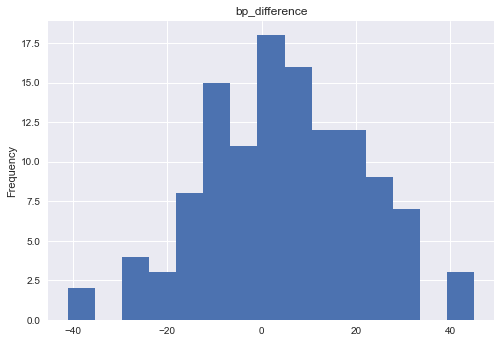

In [10]:
# histogrm
df['bp_difference'].plot(kind='hist', title= 'bp_difference', bins=15);

<AxesSubplot:>

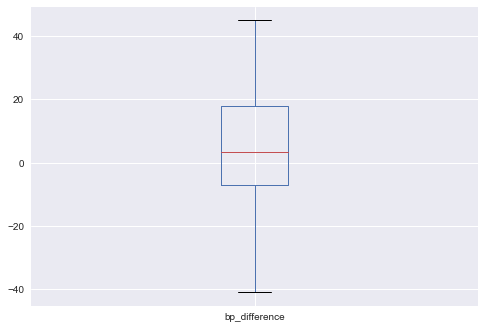

In [11]:
df['bp_difference'].plot(kind='box')

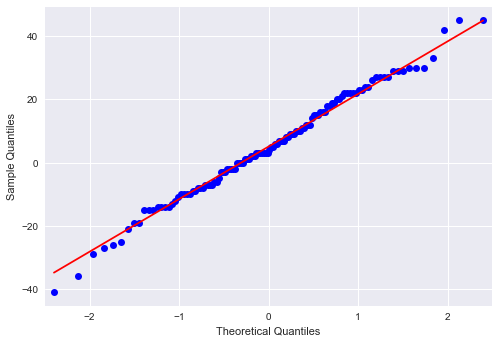

In [6]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['bp_difference'], line='s');

In [7]:
# various test for normality
x = df['bp_difference']
_, pval = stats.skewtest(x)
print(pval)
_, pval = stats.kurtosistest(x)
print(pval)
_, pval = stats.normaltest(x)
print(pval)
_, pval = stats.jarque_bera(x)
print(pval)
_, pval = stats.shapiro(x) 
print(pval)
x_ = (x-np.mean(x))/np.std(x)
_, pval = stats.kstest(x_, 'norm')
print(pval)

0.9270282358267637
0.9572747240899964
0.7841846942901611
0.9102119014351804


# Reference

[Python_for_Data_Science](https://pythonfordatascience.org/paired-samples-t-test-python/)

[Opensourcefordatascience](https://github.com/Opensourcefordatascience/Data-sets)

[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)

[How to Do a T-Test for Beginners](https://www.youtube.com/watch?v=qvPWQ-e03tQ)

[Excel - Paired Samples t-test](https://www.youtube.com/watch?v=8ebXz-SoR_E)